# mvtec monitor memory

I monitored the memory usage on the cuda machine on [2022-01-19 18h] for about one day at 1Hz.

In [4]:
%ls -lh ~/log

total 3,7M
-rw-rw-r-- 1 bertoldo bertoldo  160 janv. 19 15:28 memlog.2022-01-19-15-28-40.log
-rw-rw-r-- 1 bertoldo bertoldo   80 janv. 19 15:41 memlog.2022-01-19-15-41-41.log
-rw-rw-r-- 1 bertoldo bertoldo   80 janv. 19 15:41 memlog.2022-01-19-15-41-54.log
-rw-rw-r-- 1 bertoldo bertoldo   80 janv. 19 15:42 memlog.2022-01-19-15-42-02.log
-rw-rw-r-- 1 bertoldo bertoldo  37K janv. 19 15:50 memlog.2022-01-19-15-42-21.log
-rw-rw-r-- 1 bertoldo bertoldo 3,6M janv. 20 17:51 monitor-mvtec-unsup_pt3.log


In [5]:
%cp ~/log/monitor-mvtec-unsup_pt3.log mvtec-monitor.log

In [6]:
from pathlib import Path

In [7]:
log_fpath = Path("mvtec-monitor.log")
log_fpath.exists()

True

In [8]:
with log_fpath.open("r") as f:
    log_lines = list(f.readlines())

In [9]:
len(log_lines)

87299

In [10]:
print(log_lines[0])
print(log_lines[1])
print(log_lines[-1])

  time :     cpu % -      vms(G)     rss(G)

     1 :   75.90 % -         39         16

 87298 :  169.80 % -         47         23



In [25]:
import numpy as np

In [26]:
values = [
    [
        float(s) 
        for s in l.split("-")[1].strip().split(" ")
        if s != ""
    ]
    for l in log_lines[1:]
]

values = np.array(values)

In [27]:
values.shape

(87298, 2)

In [35]:
# one point per sec, the number of points should about one day
values.shape[0] / 60 / 60

24.249444444444446

In [28]:
vir, mem = values[:, 0], values[:, 1]

In [29]:
from matplotlib import pyplot as plt

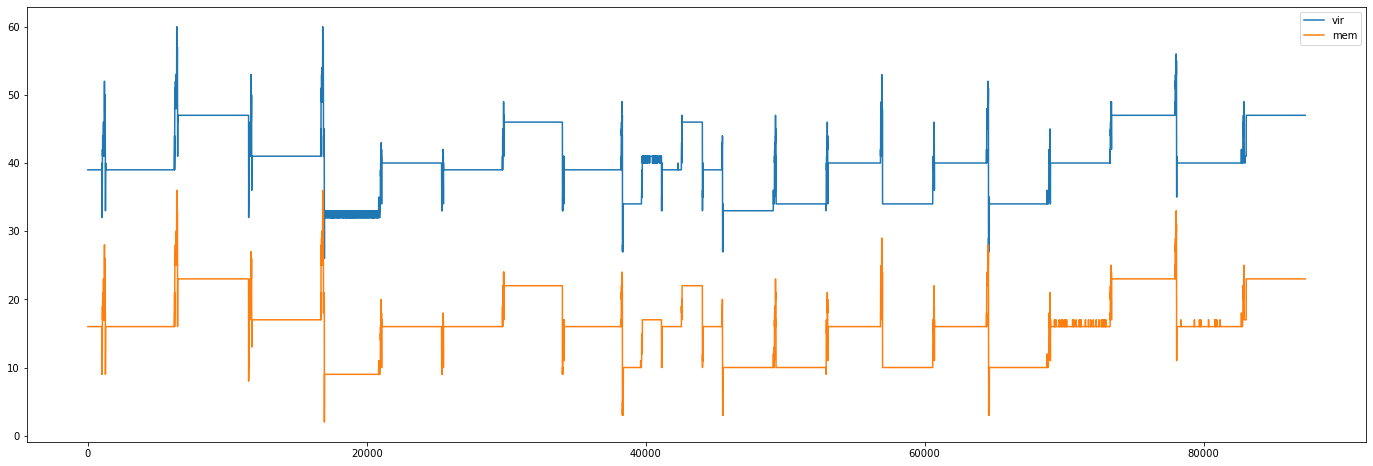

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.plot(vir, label="vir")
ax.plot(mem, label="mem")
ax.legend()